### We are using LSTM model to predict the movement of closing price. The similar approach can also be applied to other columns such as start price.
### Take AMZN as an example. The model is trained based on the AMZN data. We make a prediction about the future price with the data of past 90 days, since it is a time series problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('stocks_in_recent_5_years.csv')
df.head(10)

,date,open,high,low,close,volume,adj_close,name
0,2017-05-30,48.580002,47.790001,48.320000,47.959999,5512900.0,46.548439,AAL
1,2017-05-31,48.480000,47.529999,48.200001,48.410000,4486100.0,46.985199,AAL
2,2017-06-01,49.360001,48.299999,48.500000,49.049999,4421400.0,47.606354,AAL
3,2017-06-02,50.470001,49.369999,49.560001,49.520000,7708600.0,48.062527,AAL
4,2017-06-05,49.950001,49.400002,49.529999,49.740002,5466700.0,48.276051,AAL
5,2017-06-06,50.099998,49.320000,49.470001,49.740002,4473500.0,48.276051,AAL
6,2017-06-07,50.910000,48.799999,49.439999,50.860001,7078400.0,49.363087,AAL
7,2017-06-08,51.869999,50.410000,50.860001,51.430000,6544300.0,49.916313,AAL
8,2017-06-09,51.950001,50.250000,51.610001,50.270000,7204300.0,48.790455,AAL
9,2017-06-12,50.220001,48.099998,50.099998,49.480000,8597900.0,48.023705,AAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622537 entries, 0 to 622536
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       622537 non-null  object 
 1   open       622537 non-null  float64
 2   high       622537 non-null  float64
 3   low        622537 non-null  float64
 4   close      622537 non-null  float64
 5   volume     622537 non-null  float64
 6   adj_close  622537 non-null  float64
 7   name       622537 non-null  object 
dtypes: float64(6), object(2)
memory usage: 38.0+ MB


In [5]:
companies = df.name.unique()
companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG',
       'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALLE', 'ALL', 'AMAT',
       'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS',
       'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO',
       'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'A', 'BAC',
       'BAX', 'BA', 'BBWI', 'BBY', 'BDX', 'BEN', 'BIIB', 'BIO', 'BKNG',
       'BKR', 'BK', 'BLK', 'BLL', 'BMY', 'BRO', 'BR', 'BSX', 'BWA', 'BXP',
       'CAG', 'CAH', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CB', 'CCI', 'CCL',
       'CDAY', 'CDNS', 'CDW', 'CERN', 'CE', 'CFG', 'CF', 'CHD', 'CHRW',
       'CHTR', 'CINF', 'CI', 'CLX', 'CL', 'CMA', 'CMCSA', 'CME', 'CMG',
       'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB',
       'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA',
       'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'C', 'DAL'

In [6]:
# Create a new dataframe with AMZN parameters
stock = df.loc[df['name']=='DIS']
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 168635 to 169894
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1260 non-null   object 
 1   open       1260 non-null   float64
 2   high       1260 non-null   float64
 3   low        1260 non-null   float64
 4   close      1260 non-null   float64
 5   volume     1260 non-null   float64
 6   adj_close  1260 non-null   float64
 7   name       1260 non-null   object 
dtypes: float64(6), object(2)
memory usage: 88.6+ KB


In [7]:
stock.head()

,date,open,high,low,close,volume,adj_close,name
168635,2017-05-30,108.599998,107.949997,108.489998,108.339996,4813400.0,103.748573,DIS
168636,2017-05-31,108.650002,107.639999,108.400002,107.940002,9963600.0,103.365532,DIS
168637,2017-06-01,108.209999,107.169998,107.730003,108.209999,5907400.0,103.624084,DIS
168638,2017-06-02,108.639999,106.949997,108.459999,107.180000,10876900.0,102.637733,DIS
168639,2017-06-05,107.220001,106.110001,107.040001,106.519997,6372800.0,102.005707,DIS


In [8]:
# A closing prices array
training_set = stock[['close']]
training_set.head()

,close
168635,108.339996
168636,107.940002
168637,108.209999
168638,107.180000
168639,106.519997


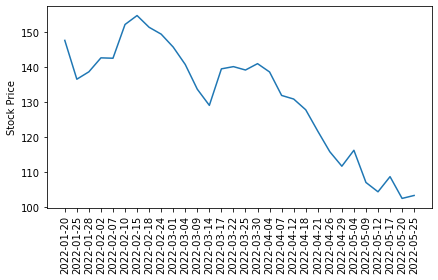

In [27]:
# Show 90 days training data
training_set_y = stock['close'][-90:][::3].tolist()
training_set_x = stock['date'][-90:][::3].tolist()
plt.plot(training_set_x, training_set_y)
plt.tick_params(axis='x', labelsize=10, rotation=90)
plt.tight_layout()
plt.ylabel('Stock Price')
plt.xlabel(None)
plt.show()

In [23]:
# normalizing the values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_training_set = sc.fit_transform(training_set)
scaled_training_set.shape

(1260, 1)

### Create x_train and y_train.
* x_train: values of closing prices of past 365 days
* y_train: values of closing prices of the present day

In [28]:
x_train = []
y_train = []
timestamp = 365
length = len(training_set)
for i in range(timestamp, length):
    x_train.append(scaled_training_set[i-timestamp:i, 0])
    y_train.append(scaled_training_set[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [29]:
print (x_train[0])
print ('\n')
print (y_train[0])

[0.19440374 0.19095997 0.19328452 0.18441668 0.17873435 0.16995263
 0.17356862 0.15979335 0.1709858  0.18321135 0.17907874 0.17546274
 0.17408524 0.17003874 0.16883341 0.15652174 0.16392596 0.15893241
 0.16013774 0.17055529 0.1691778  0.18166163 0.17176063 0.17640979
 0.18682735 0.17107185 0.15144207 0.15118379 0.15350834 0.15566073
 0.1603099  0.15953507 0.16642268 0.16383985 0.17210502 0.18131724
 0.18596641 0.18364179 0.18286696 0.1778734  0.18235041 0.20869563
 0.20835124 0.20809296 0.21394747 0.19724491 0.20111924 0.18880758
 0.17727074 0.1826948  0.14696513 0.13422295 0.13973307 0.13465346
 0.13560051 0.14154106 0.13448123 0.12862673 0.13267323 0.14644851
 0.1355144  0.13568656 0.14334913 0.14464051 0.14472662 0.14730952
 0.13293151 0.1355144  0.13637534 0.1355144  0.09728795 0.09737406
 0.09754623 0.1044339  0.11244079 0.10452001 0.10985789 0.1062419
 0.10908307 0.11579851 0.11304345 0.11054667 0.11889795 0.11080495
 0.11605678 0.10581146 0.1102884  0.12139473 0.12940162 0.12733

In [30]:
x_train.shape

(895, 365)

In [31]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(895, 365, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units = 92, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')